# Projet d'Analyse Boursière

###Ce projet est conçu pour être assez stimulant car il introduira quelques nouveaux concepts par le biais de quelques astuces !

Bienvenue à votre projet d'analyse boursière.

Nous analyserons les données sur les actions de quelques compagnies automobiles du 1er janvier 2012 au 1er janvier 2017. Gardez à l'esprit que ce projet est principalement fait pour pratiquer vos compétences avec matplotlib, pandas et numpy. Ne déduisez pas des conseils de trading financier de l'analyse que nous faisons ici !

### Partie 0: Importations

**Importez les différentes bibliothèques dont vous aurez besoin - vous pouvez toujours revenir ici ou importer au fur et à mesure :)**

In [265]:
# module pour nous permettre d'installer les packages pour plot les chandeliers japonais 
!pip install mplfinance
!pip install pandas_datareader

#si ca ne fonctionne pas, rajouter cette ligne aussi 
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip 

#!pip install finplot
#pip uninstall finplot -- yes

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip


In [266]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [267]:
import numpy as np 
import pandas as pd 
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix

import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import plotly.figure_factory
import seaborn as sns
#import finplot as fplt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import datetime as dt
from datetime import date

____
## Partie 1: Obtenir les données

### Action Tesla (Ticker: TSLA sur le NASDAQ)

**Note ! Tout le monde ne travaillera pas sur un ordinateur qui lui donnera un accès complet pour télécharger les informations boursières en utilisant pandas_datareader (pare-feu, permissions d'administration, etc...). Pour cette raison, le fichier csv pour Tesla :Il s'appelle Tesla_Stock.csv. N'hésitez pas à l'utiliser avec read_csv !**

**Utilisez pandas_datareader pour obtenir les informations historiques sur les actions de Tesla du 1er janvier 2012 au 1er janvier 2017.**



In [268]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2017,1,1)

tesla = web.DataReader('Tsla', 'yahoo', start, end)
tesla_stock = pd.read_csv('C:/Users/kawta/OneDrive/Bureau/EDC/Python Avancé/Projet2/1/Tesla_Stock.csv', index_col='Date')

In [269]:
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


### Autres entreprises automobiles

**Répétez les mêmes étapes pour extraire les données pour Ford et GM (General Motors)**

In [270]:
ford_stock = pd.read_csv('C:/Users/kawta/OneDrive/Bureau/EDC/Python Avancé/Projet2/1/Ford_Stock.csv', index_col='Date')  
ford = web.DataReader('ford', 'yahoo', start, end)  

gm_stock = pd.read_csv('C:/Users/kawta/OneDrive/Bureau/EDC/Python Avancé/Projet2/1/GM_Stock.csv', index_col='Date')
gm = web.DataReader('gm', 'yahoo', start, end)


tesla_stock.index = pd.to_datetime(tesla_stock.index)
gm_stock.index = pd.to_datetime(gm_stock.index)
ford_stock.index = pd.to_datetime(ford_stock.index)

In [271]:
ford_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619


In [272]:
gm_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


## Partie 2: Visualisation des données

**Il est temps de visualiser les données.**

**Suivez et recréez les graphiques ci-dessous en suivant les instructions et les explications.**

____

**Recréez ce tracé linéaire de tous les prix à l'ouverture des différentes actions! Astuce: Pour la légende, utilisez le paramètre label et plt.legend()**

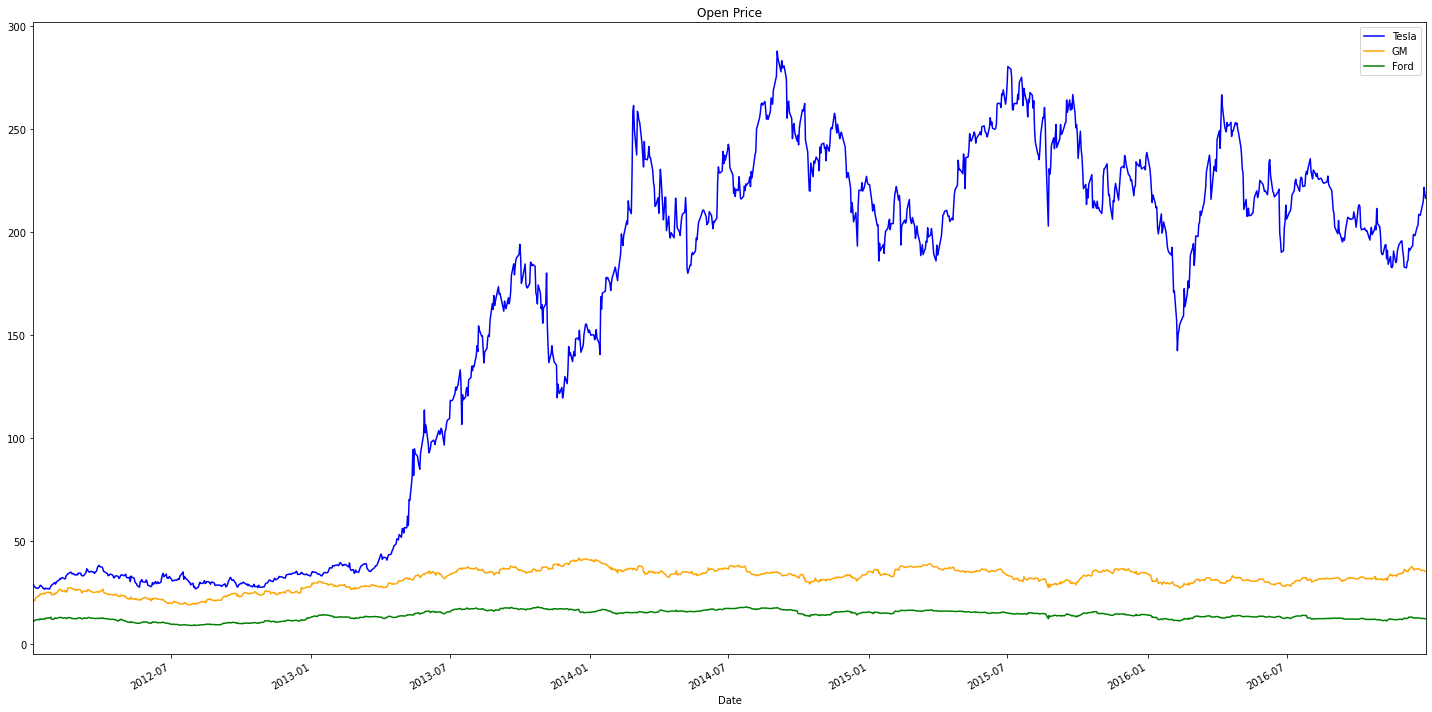

In [273]:

fig,ax =plt.subplots(figsize=(20,10))
tesla_stock.Open.plot(legend='Tesla', color='b')
gm_stock.Open.plot(legend='GM' , color='orange')
ford_stock.Open.plot(legend='Ford', color='g')
locator = mdates.AutoDateLocator(maxticks=9)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlim([tesla.index[0], tesla.index[tesla.index.__len__()-1]])
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.title('Open Price')
plt.legend(['Tesla','GM','Ford']);
plt.show()

____

**Tracez le volume des actions négociées chaque jour.**

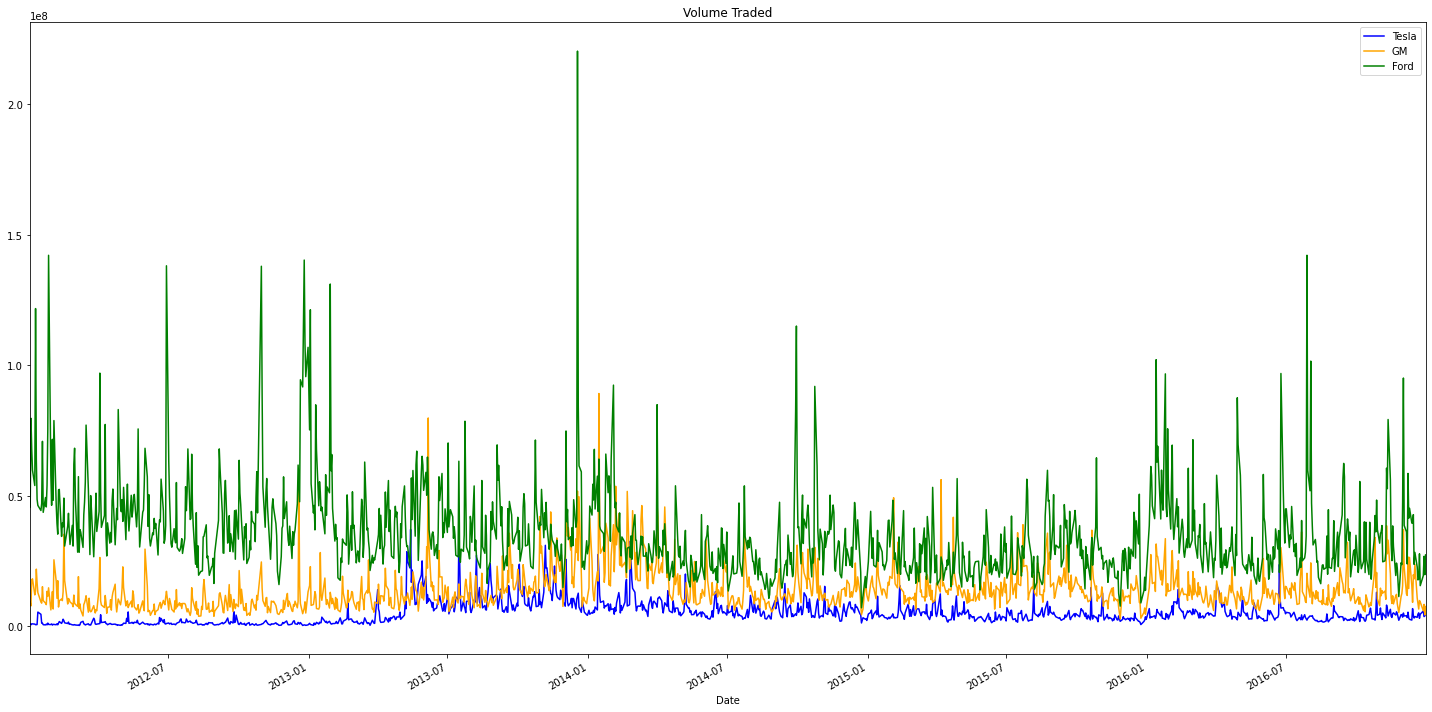

In [274]:
fig,ax =plt.subplots(figsize=(20,10))

# formater les axes pour afficher sous formats année, mois

locator = mdates.AutoDateLocator(maxticks=9)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlim([tesla.index[0], tesla.index[tesla.index.__len__()-1]])
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

tesla_stock.Volume.plot(legend='Tesla', color='b')
gm_stock.Volume.plot(legend='GM' , color='orange' )
ford_stock.Volume.plot(legend='Ford', color='g')
plt.title('Volume Traded')
plt.legend(['Tesla','GM','Ford']);

**Intéressant, il semble que Ford ait eu un très gros pic fin 2013. Quelle était la date de ce volume d'échange maximum pour Ford ?**

**Bonus: Que s'est-il passé ce jour-là?**

In [275]:

ford_stock[ford_stock.Volume==max(ford_stock.Volume)].index

# Le 18 décembre 2013 il y a eu un gros pic 

DatetimeIndex(['2013-12-18'], dtype='datetime64[ns]', name='Date', freq=None)

____

*La visualisation du prix à l'ouverture des séries temporelles donne l'impression que Tesla a toujours eu beaucoup plus de valeur en tant qu'entreprise que GM et Ford. Mais pour vraiment comprendre cela, il faudrait regarder la capitalisation boursière totale de la société, et pas seulement le cours de l'action. Malheureusement, nos données actuelles n'ont pas cette information du nombre total d'unités d'actions présentes. Mais ce que nous pouvons faire comme simple calcul pour essayer de représenter l'argent total échangé serait de multiplier la colonne 'Volume' par le cours de l'action. Rappelez-vous que ce n'est pas encore la capitalisation boursière réelle, c'est juste une représentation visuelle de la quantité totale d'argent échangé en utilisant la série temporelle. (par exemple 100 unités d'actions à 10 dollars chacune contre 100 000 unités d'actions à 1 dollars chacune)*

**Créez une nouvelle colonne pour chaque dataframe appelée "Total Traded" qui est le prix d'ouverture multiplié par le volume négocié.**

In [276]:
# Création de la nouvelle colonne pour les 3 dataset 
ford_stock['Total_Traded'] = ford_stock.Volume*ford_stock.Open
tesla_stock['Total_Traded'] = tesla_stock.Volume*tesla_stock.Open
gm_stock['Total_Traded'] = gm_stock.Volume*gm_stock.Open

In [277]:
ford_stock.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total_Traded
Date,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860,5.028089e+08
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559,8.889359e+08
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754,7.690521e+08
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250,7.025298e+08
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619,6.386011e+08


In [278]:
tesla_stock.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total_Traded
Date,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07


In [279]:
gm_stock.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total_Traded
Date,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08


**Tracez ce total négocié (Total Traded) par rapport à l'index de temps.**

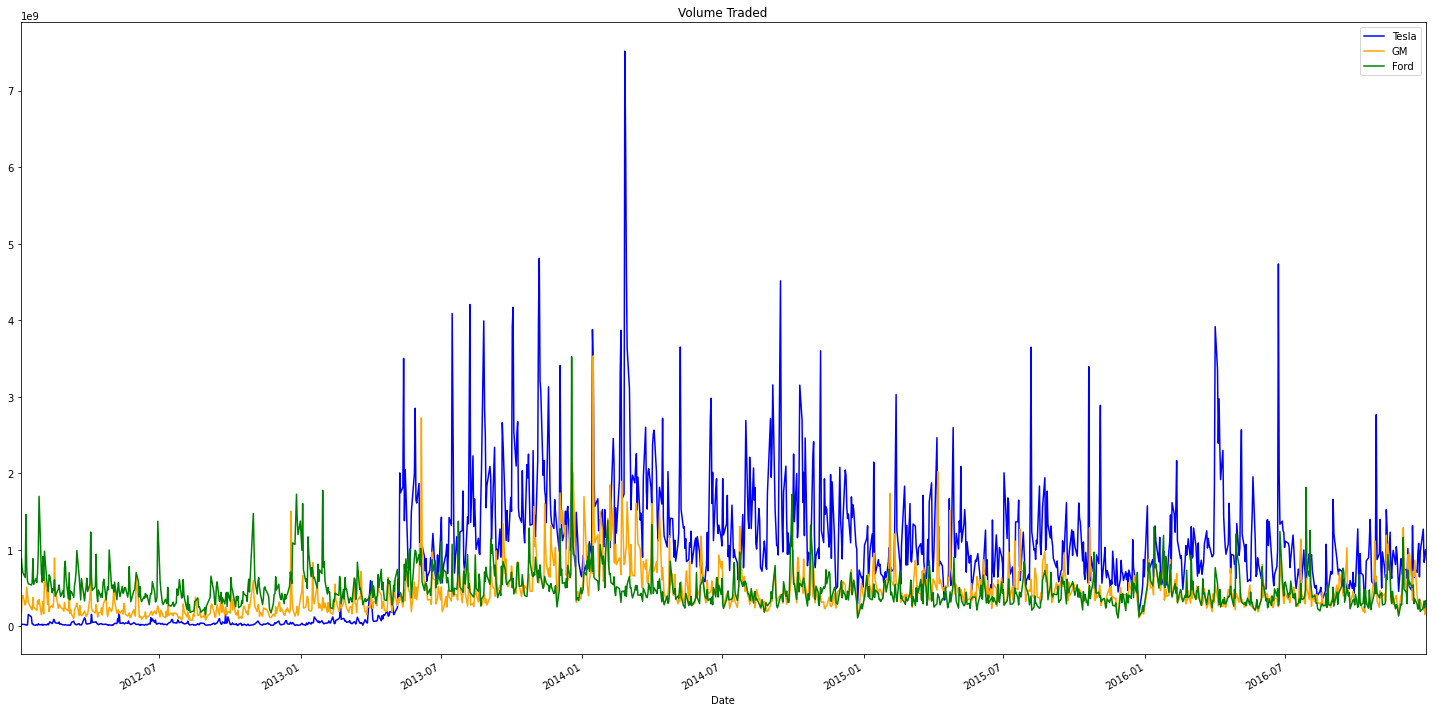

In [280]:


fig,ax =plt.subplots(figsize=(20,10))

# formater les axes pour afficher sous formats année, mois

locator = mdates.AutoDateLocator(maxticks=9)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlim([tesla.index[0], tesla.index[tesla.index.__len__()-1]])
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

tesla_stock['Total_Traded'].plot(legend='Tesla', color='b')
gm_stock['Total_Traded'].plot(legend='GM' , color='orange' )
ford_stock['Total_Traded'].plot(legend='Ford', color='g')
plt.title('Volume Traded')
plt.legend(['Tesla','GM','Ford']);

**Intéressant, il semble qu'il y ait eu une énorme quantité d'argent échangé pour Tesla début 2014. Quelle date c'était et que s'est-il passé ?**

In [282]:

tesla_stock[tesla_stock['Total_Traded']== max(tesla_stock['Total_Traded'])].index

#le 25 février 2014 il y ait eu une énorme quantité d'argent échangé pour Tesla

DatetimeIndex(['2014-02-25'], dtype='datetime64[ns]', name='Date', freq=None)

**Entraînons-nous à tracer des moyennes glissantes ou mobiles (MA - Moving Averages). Tracez MA50 et MA200 pour GM.**

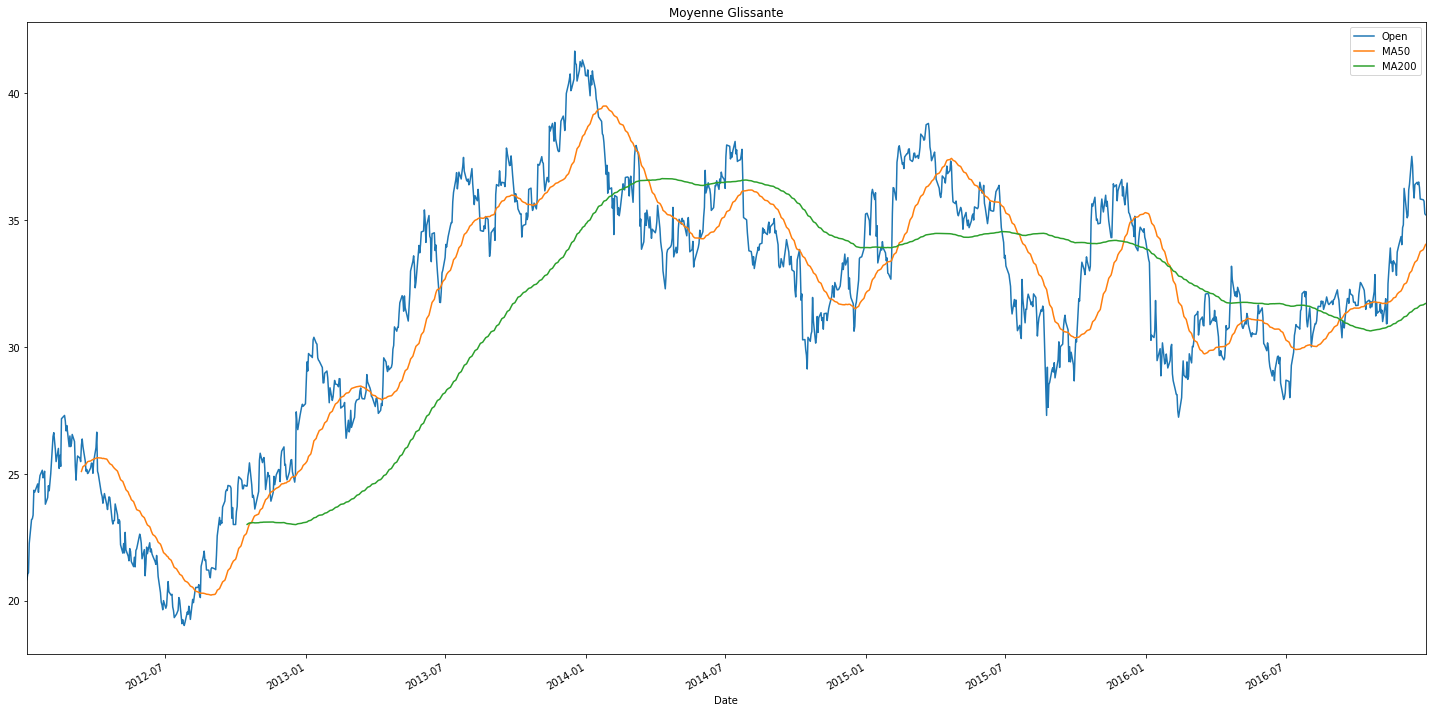

In [283]:
# Code ici

fig,ax =plt.subplots(figsize=(20,10))

# formater les axes pour afficher sous formats année, mois

locator = mdates.AutoDateLocator(maxticks=9)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlim([gm.index[0], gm.index[gm.index.__len__()-1]])
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
gm_stock['MA50'] = gm_stock.Close.rolling(50).mean()
gm_stock['MA200'] = gm_stock.Close.rolling(200).mean()

gm_stock['Open'].plot()
gm_stock['MA50'].plot()
gm_stock['MA200'].plot()

plt.title('Moyenne Glissante')
plt.legend(['Open','MA50','MA200']);



______

**Enfin, voyons s'il existe une relation entre ces actions car elles sont tous liées à l'industrie automobile. Nous pouvons le voir facilement à travers un diagramme de dispersion. Importez la matrice de dispersion de pandas.plotting et utilisez-la pour créer un diagramme de dispersion du prix d'ouverture de toutes les actions. Vous devrez peut-être réorganiser les colonnes dans un nouveau dataframe unique. Vous trouverez des conseils et des informations ici: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot**

In [284]:
scatter_mat = pd.concat([tesla_stock.Open, gm_stock.Open, ford_stock.Open], axis=1)
scatter_mat.columns=['Tesla Open', 'GM Open', 'Ford Open']

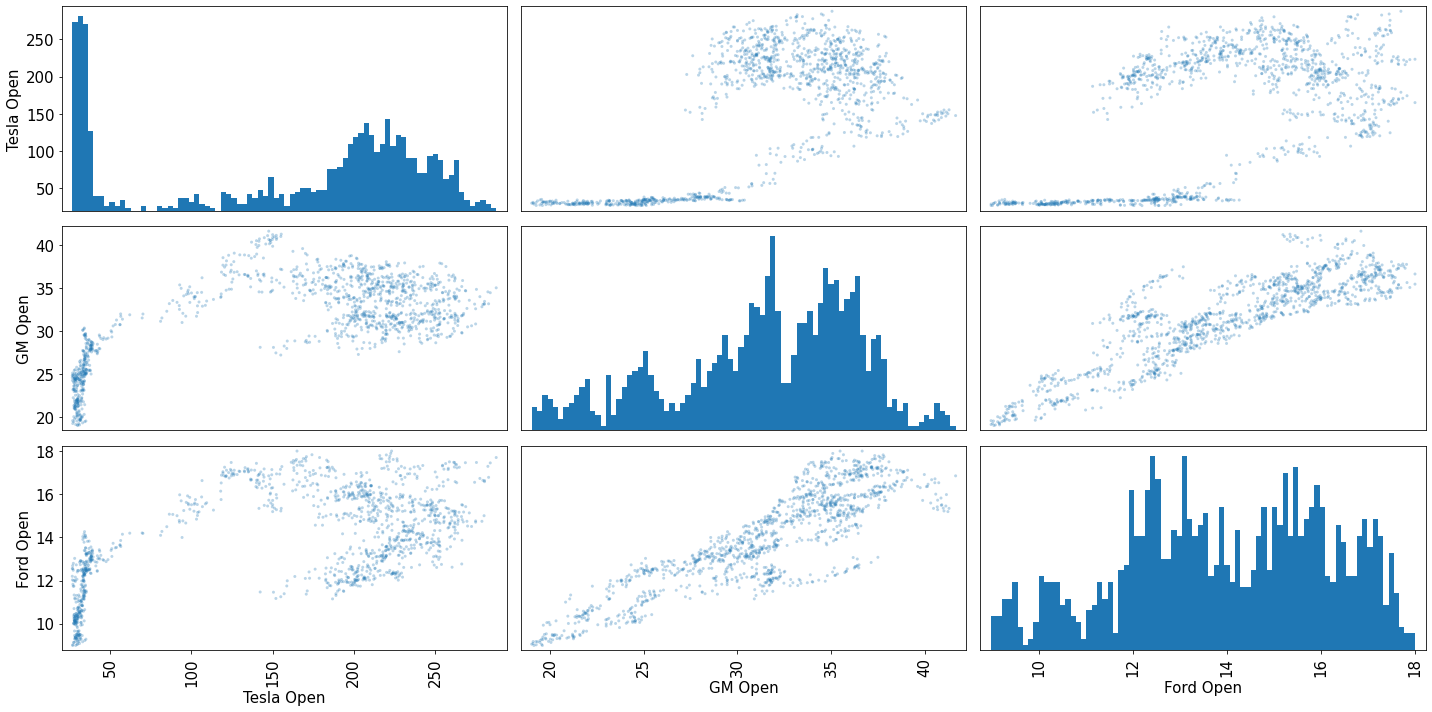

In [285]:
axes = scatter_matrix(scatter_mat, figsize=(20,10), alpha=0.3, diagonal='hist', hist_kwds={'bins':80});

## Pour augmenter un peu la taille de la police des axes et des ticks du plot 
#y ticklabels

[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 15) for item in axes.ravel()];
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 15) for item in axes.ravel()];

In [286]:
# Code ici
help(candlestick_ohlc)


#tesla_stock.index = pd.to_datetime(tesla_stock.index)
#gm_stock.index = pd.to_datetime(gm_stock.index)
#ford_stock.index = pd.to_datetime(ford_stock.index)

Help on function candlestick_ohlc in module mpl_finance:

candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)
    Plot the time, open, high, low, close as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, high, low, close, ...) sequences
        As long as the first 5 elements are these values,
        the record can be as long as you want (e.g., it may store volume).
    
        time must be in float days format - see date2num
    
    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level
   

In [287]:
# Technique 1 ne marche pas encore

#fplt.candlestick_ochl(ford_stock[['Open','High','Low','Close']]);
#fplt.show()

#ford_stock['Date']=mdates.date2num(ford_stock['Date'].astype(dt.date))
#candlestick_ohlc(ford_stock.Date,(ford_stock.Open,ford_stock.High,ford_stock.Low,ford_stock.Close))

# Technique 2 ne marche pas encore 

#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.xaxis_date()
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#plt.ylabel("Price")
#plt.title(ticker)
#ax1.grid(True)
#plt.legend(loc='best')
#plt.xticks(rotation=45)
#candlestick_ohlc(ax1, ford_stock.values, width=0.6, colorup='g', colordown='r')
#plt.show()




In [288]:
# Technique 3 

start_date = pd.to_datetime(dt.date(2012,1,1))
end_date = pd.to_datetime(dt.date(2012,1,31))

df_ford = ford_stock[(start_date < ford_stock.index) & (ford_stock.index <= end_date)]
fig = plotly.figure_factory.create_candlestick(df_ford.Open, df_ford.High, 
                                               df_ford.Low, df_ford.Close, dates=df_ford.index)
fig.show()

____
# Partie 3: Analyse financière de base

Il est maintenant temps de se concentrer sur quelques calculs financiers clés. Vous n'avez qu'à suivre les instructions, il s'agira principalement d'un exercice de conversion d'une équation ou d'un concept mathématique en code à l'aide de python et pandas, ce que nous ferons souvent lorsque nous travaillerons avec des données quantitatives! 

Commençons !
____

## Rendement quotidien en pourcentage
Nous commencerons par calculer la rendement quotidienne en pourcentage. Le rendement (en %) est défini par la formule suivante :

$ r_t = \frac{p_t}{p_{t-1}} -1$

Cela définit r_t (rendement à l'instant t) comme étant égal au prix à l'instant t divisé par le prix à l'instant t-1 (la veille) moins 1. En gros, cela vous informe simplement de votre pourcentage de gain (ou de perte) si vous avez acheté l'action le jour et l'avez ensuite vendue le lendemain. Bien que cela ne soit pas nécessairement utile pour tenter de prédire les valeurs futures du titre, c'est très utile pour analyser la volatilité du titre. Si les rendements quotidiens ont une large distribution, le titre est plus volatil d'un jour à l'autre. Calculons les pourcentages de rendement, puis traçons un histogramme et décidons quel titre est le plus stable!

**Créez une nouvelle colonne pour chaque dataframe appelée 'returns'. Cette colonne sera calculée à partir de la colonne de prix à la fermeture'Close'. Il y a deux façons de faire cela, soit un simple calcul en utilisant la méthode .shift() qui suit la formule ci-dessus, ou vous pouvez aussi utiliser la méthode pct_change intégrée à pandas.**

In [ ]:
# Méthode 1: en utilisant shift

In [289]:
dfs = [tesla_stock, gm_stock, ford_stock]
for df in dfs:
    df['return'] = (df.Close/df.Close.shift(1))-1

In [290]:
tesla_stock.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total_Traded,return
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [291]:
# méthode 2: en utilisant pct_changes
#help(pd.DataFrame.pct_change)   ça à l'air ok de laisser les arguments par défaut

for df in dfs:
    df['pct_change_return'] = df.Close.pct_change()

In [292]:
tesla_stock.head(5)  ### les deux méthodes renvoient les mêmes valeurs 

,High,Low,Open,Close,Volume,Adj Close,Total_Traded,return,pct_change_return
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.012635


In [293]:
ford_stock.head(5)


,High,Low,Open,Close,Volume,Adj Close,Total_Traded,return,pct_change_return
Date,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860,5.028089e+08,NaN,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559,8.889359e+08,0.015274,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754,7.690521e+08,0.025664,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250,7.025298e+08,0.010354,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619,6.386011e+08,0.007686,0.007686


In [294]:
gm_stock.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total_Traded,MA50,MA200,return,pct_change_return
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08,NaN,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08,NaN,NaN,0.004751,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08,NaN,NaN,0.048227,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08,NaN,NaN,0.033829,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08,NaN,NaN,-0.003490,-0.003490


**Maintenant, tracez un histogramme des rendements de chaque entreprise. Soit vous les faites séparément, soit vous les empilez les uns sur les autres. Quelle est l'action la plus "volatile"? (selon la variance des rendements quotidiens, nous discuterons de la volatilité de façon beaucoup plus détaillée dans les prochaines sections).**

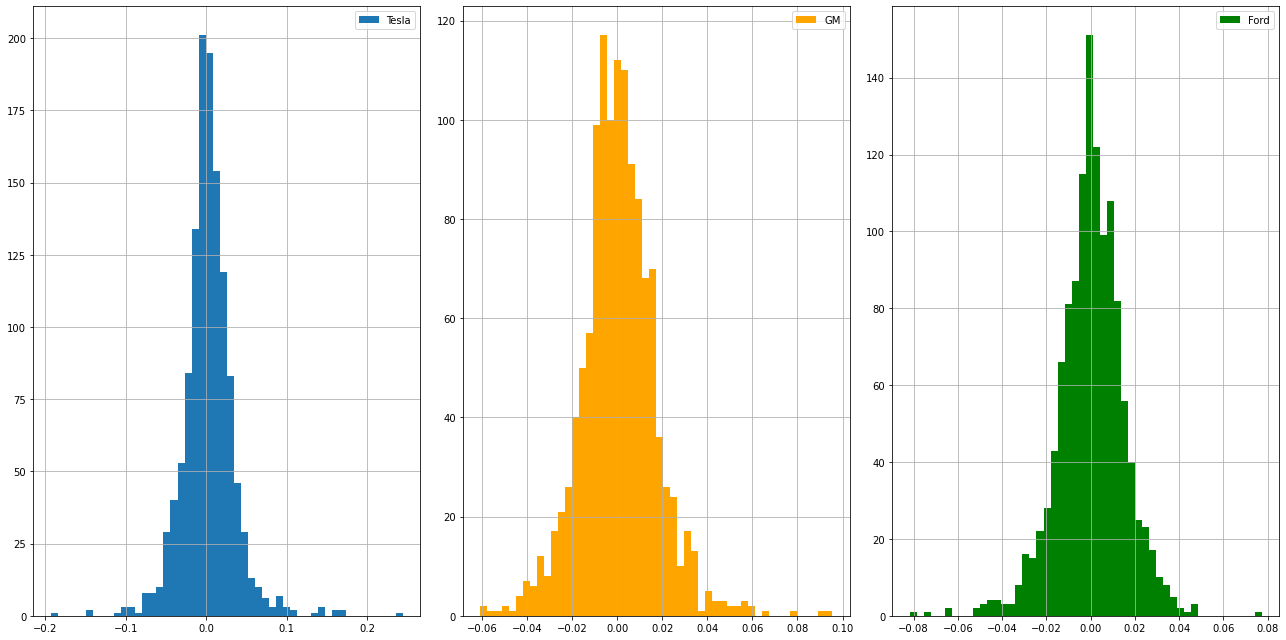

In [295]:
fig, ax = plt.subplots(1,3, figsize=(18,9))

tesla_stock['return'].hist(ax=ax[0], bins=50)
ax[0].legend(['Tesla'])
gm_stock['return'].hist(ax=ax[1], color='orange', bins=50)
ax[1].legend(['GM'])
ford_stock['return'].hist(ax=ax[2], color='g', bins=50)
ax[2].legend(['Ford'])
plt.show()

Text(0.5, 1.0, 'Histogramme des rendements')

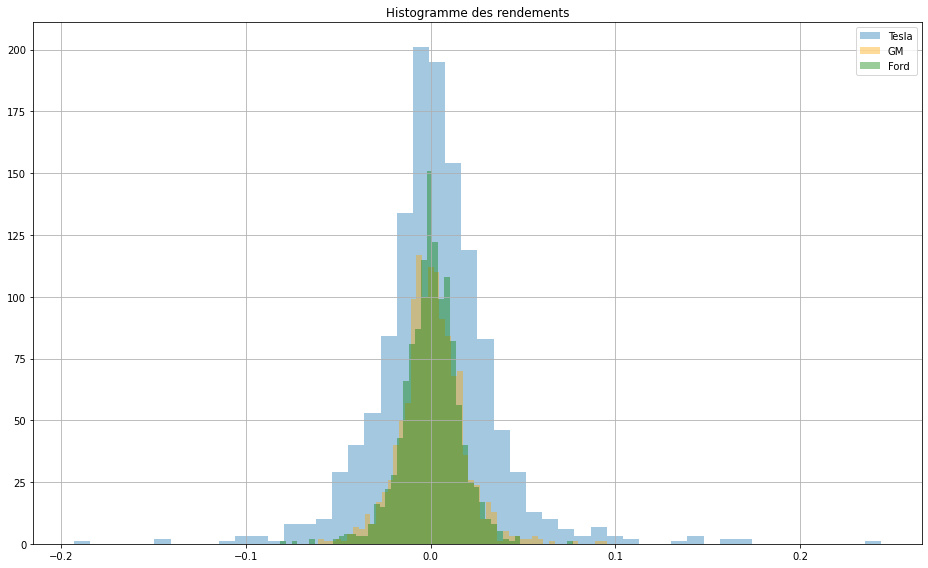

In [297]:
plt.figure(figsize=(13,8))
tesla_stock['return'].hist(bins=50,alpha=0.4)
gm_stock['return'].hist(color='orange', bins=50, alpha=0.4)
ford_stock['return'].hist(color='g', bins=50, alpha=0.4)
plt.legend(['Tesla', 'GM', 'Ford'])
plt.title('Histogramme des rendements')

**Essayez aussi de tracer un KDE au lieu dun 'histogrammes pour avoir un autre point de vue. Quelle action a le tracé le plus large?**

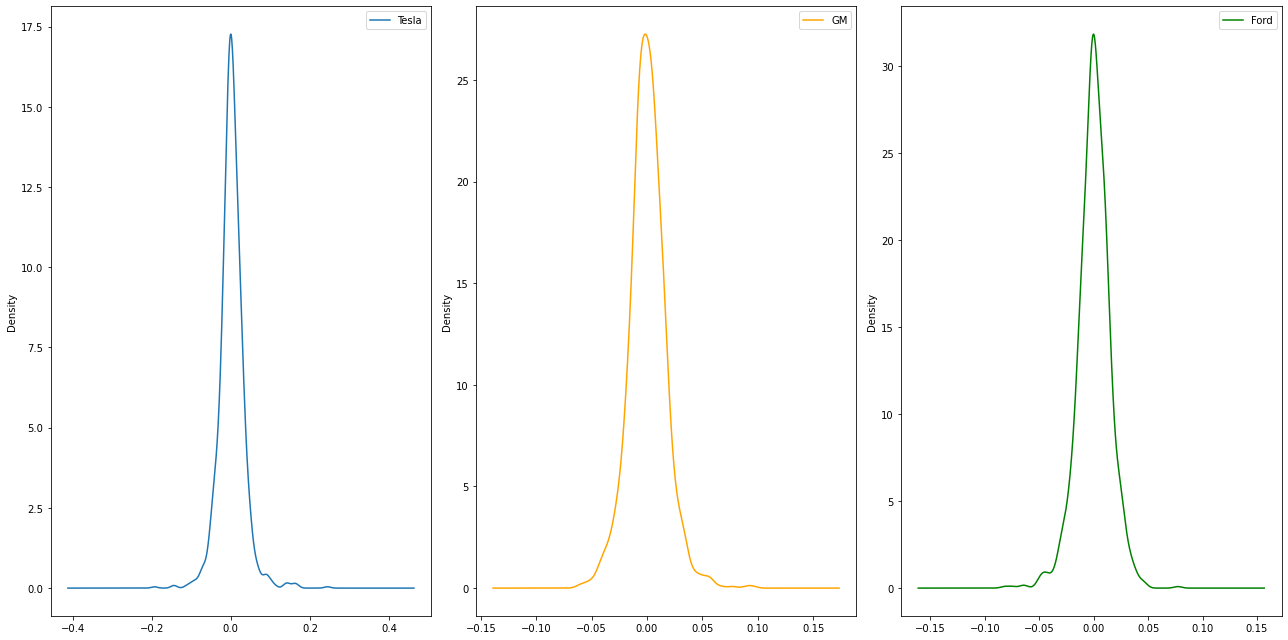

In [299]:
fig, ax = plt.subplots(1,3, figsize=(18,9))

tesla_stock['return'].plot.kde(ax=ax[0])
ax[0].legend(['Tesla'])
gm_stock['return'].plot.kde(ax=ax[1], color='orange')
ax[1].legend(['GM'])
ford_stock['return'].plot.kde(ax=ax[2], color='g')
ax[2].legend(['Ford'])
plt.show()

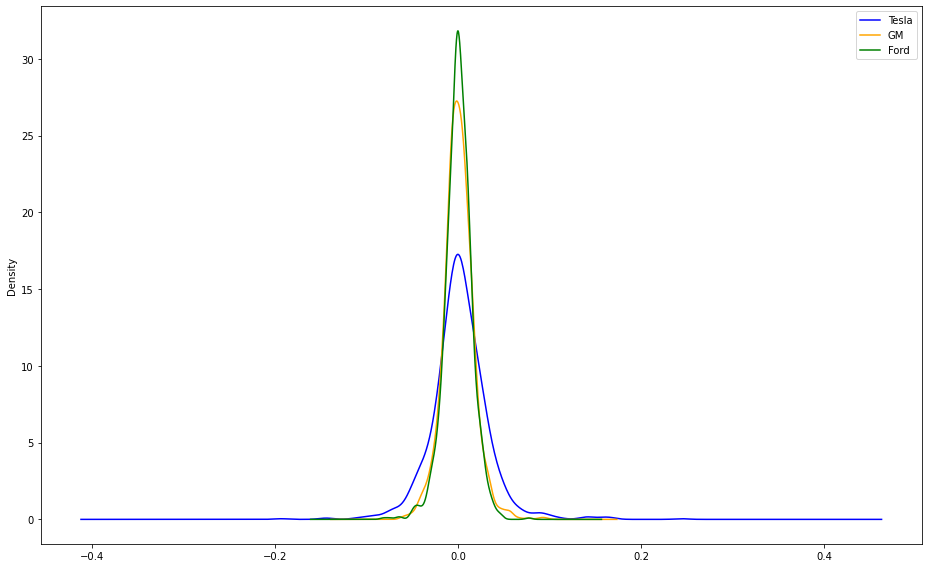

In [302]:
plt.figure(figsize=(13,8))
tesla_stock['return'].plot.kde(color='blue')
gm_stock['return'].plot.kde(color='orange')
ford_stock['return'].plot.kde(color='g')
plt.legend(['Tesla', 'GM', 'Ford'])
plt.show()

**Essayez aussi de créer des diagrammes en boîtes comparant les rendements.**

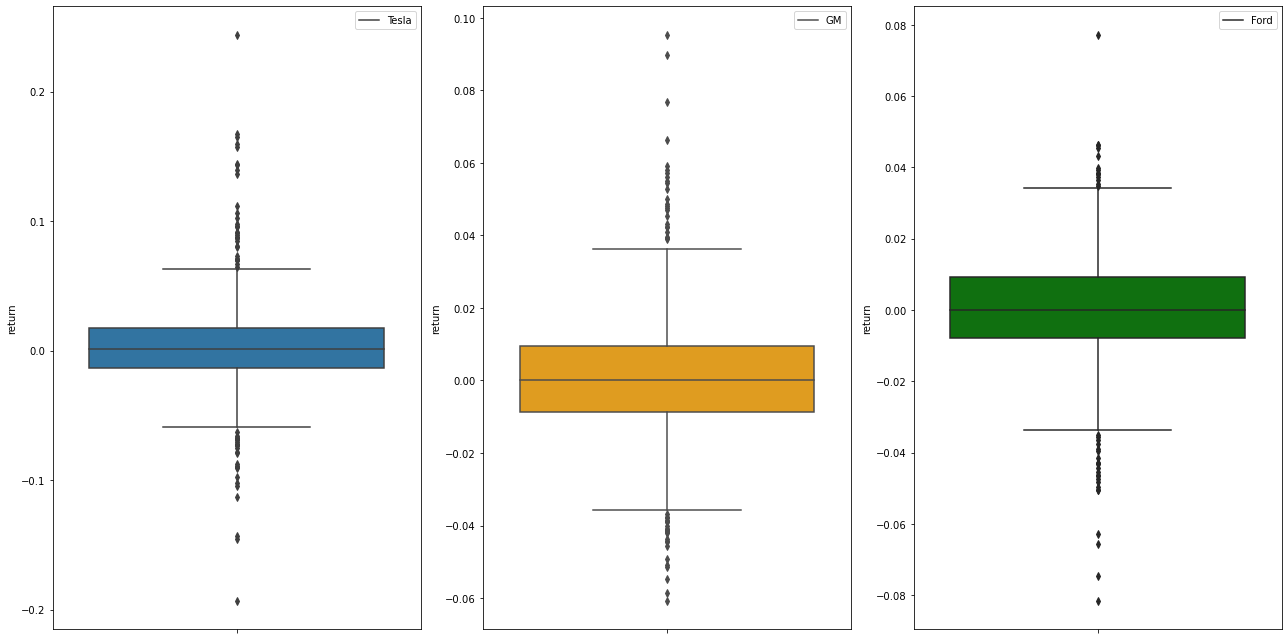

In [303]:
# Affichage des boxplots séparées pour chaque action

fig, ax = plt.subplots(1,3, figsize=(18,9))

sns.boxplot(y=tesla_stock['return'], ax=ax[0])
ax[0].legend(['Tesla'])
sns.boxplot(y=gm_stock['return'], ax=ax[1], color='orange')
ax[1].legend(['GM'])
sns.boxplot(y=ford_stock['return'], ax=ax[2], color='g')
ax[2].legend(['Ford'])
plt.show()

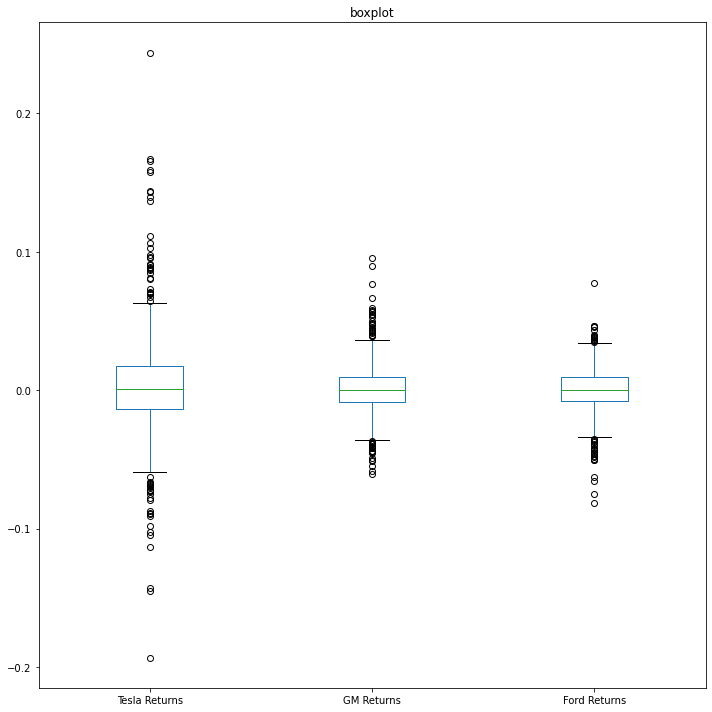

In [304]:
# Affichage de toutes les boxplots sur le même graphique 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Tesla Returns": tesla_stock['return'], "GM Returns":gm_stock['return'], "Ford Returns": ford_stock['return']})

# Plot the dataframe
ax = data[['Tesla Returns', 'GM Returns', 'Ford Returns']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

## Comparaison des rendements quotidiens entre les actions

**Créez un graphique matriciel de dispersion pour voir la corrélation entre les rendements quotidiens de chaque titre. Cela permet de répondre à la question de savoir dans quelle mesure les sociétés automobiles sont liées entre elles. Le marché considère-t-il Tesla comme une entreprise de technologie plutôt que comme une entreprise automobile ?**

In [305]:
df_return = pd.concat([tesla_stock['return'], gm_stock['return'], ford_stock['return']], axis=1)
df_return.columns = ['Tesla', 'GM', 'Ford']

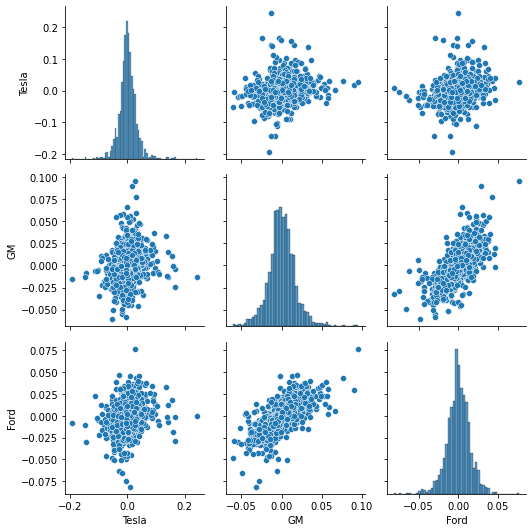

In [306]:
palette = sns.color_palette("flare", as_cmap=True)
sns.pairplot(df_return, palette={palette})


**Il semble que Ford et GM aient une sorte de relation, traçons juste ces deux-là dans un diagramme de dispersion pour voir cela de plus près !**

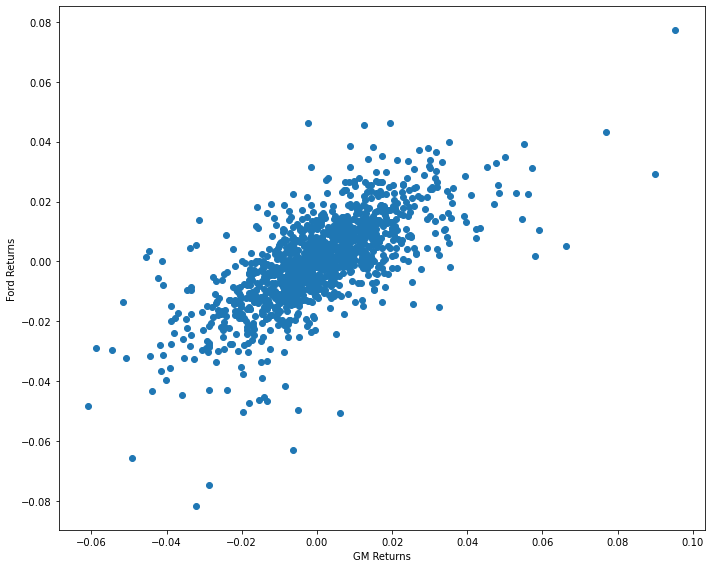

In [316]:
plt.figure(figsize=(10,8))
plt.scatter(df_return['GM'], df_return['Ford'])
plt.xlabel('GM Returns')
plt.ylabel('Ford Returns')
plt.show()

## la relation entre Ford et GM semble linéaire 

____
## Rendements quotidiens cumulatifs

Super ! Nous pouvons maintenant voir quel titre a eu le plus grand écart de rendement quotidien (vous auriez dû vous rendre compte que c'était Tesla, notre graphique original du cours de l'action aurait dû aussi le montrer).

Avec les rendements cumulatifs quotidiens, la question à laquelle nous essayons de répondre est la suivante: si j'avais investi 1$ dans l'entreprise au début de la série temporelle, combien vaudrait-elle aujourd'hui? Cette question est différente de celle du prix de l'action à la journée courante, car elle tiendra compte des rendements quotidiens. N'oubliez pas que notre simple calcul ici ne tiendra pas compte des actions qui redonnent un dividende. Examinons quelques exemples simples:

Disons qu'il y a une action "ABC" qui est activement négociée en bourse. ABC a les prix suivants correspondant aux dates indiquées:

    Date                        Prix
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Rendement quotidien**: Le rendement quotidien est le profit ou perte réalisé par l'action par rapport à la veille. (C'est ce qu'on vient de calculer ci-dessus). Une valeur supérieure à 1 indique un profit, de même qu'une valeur inférieure à 1 indique une perte. Il est également exprimé en pourcentage pour mieux transmettre l'information. (Exprimé en pourcentage, si la valeur est supérieure à 0, le titre vous a donné un profit, sinon une perte). Ainsi, pour l'exemple ci-dessus, les rendements quotidiens seraient

    Date                 Rendement quotidien      %Rendement quotidien
    01/01/2018               10/10 =  1                      -   
    01/02/2018               15/10 =  3/2                    50%
    01/03/2018               20/15 =  4/3                    33%
    01/04/2018               25/20 =  5/4                    20%

**Rendement Cumulé**: Bien que les rendements quotidiens soient utiles, ils ne donnent pas à l'investisseur un aperçu immédiat des gains qu'il a réalisés jusqu'à présent, surtout si le titre est très volatil. Le rendement cumulatif est calculé par rapport au jour où l'investissement est effectué.  Si le rendement cumulatif est supérieur à 1, vous faites des profits, sinon vous êtes en perte. Donc, pour l'exemple ci-dessus, les gains cumulatifs sont les suivants:

    Date                Rendement cumulé         %rendement cumulé
    01/01/2018              10/10 =  1               100 %   
    01/02/2018              15/10 =  3/2             150 %
    01/03/2018              20/10 =  2               200 %
    01/04/2018              25/10 =  5/2             250 %

La formule pour un rendement quotidien cumulatif est la suivante :

$ i_i = (1+r_t) * i_{t-1} $

Ici, nous pouvons voir que nous ne faisons que multiplier notre investissement précédent à i à t-1 par 1+notre pourcentage de rendement. Pandas rend cela très simple à calculer avec sa méthode cumprod(). En utilisant quelque chose de la manière suivante :

    df[daily_cumulative_return] = (1 + df[pct_daily_return]).cumprod()
    

**Créez une colonne de rendement quotidien cumulatif (cumulative daily return) pour le dataframe de chaque société automobile.**

In [307]:
for df in dfs:
    df['cumulative daily return'] = (1+df['return']).cumprod()
    ## en rajoutant aussi la même colonne de rendement quotidien cumulatif mais en % 
    df['% cumulative daily return'] = round((1+df['return']).cumprod()*100,2).astype(str)+'%' 

In [308]:
tesla_stock.head(5)

,High,Low,Open,Close,Volume,Adj Close,Total_Traded,return,pct_change_return,cumulative daily return,% cumulative daily return
Date,,,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN,NaN,nan%
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,-0.013177,0.986823,98.68%
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,-0.021292,0.965812,96.58%
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,-0.007743,0.958333,95.83%
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.012635,0.970442,97.04%


**Tracez maintenant les colonnes de rendement cumulatif en fonction de l'index de la série temporelle. Quel titre a affiché le rendement le plus élevé pour un dollar investi? Lequel a affiché le rendement le plus faible?**

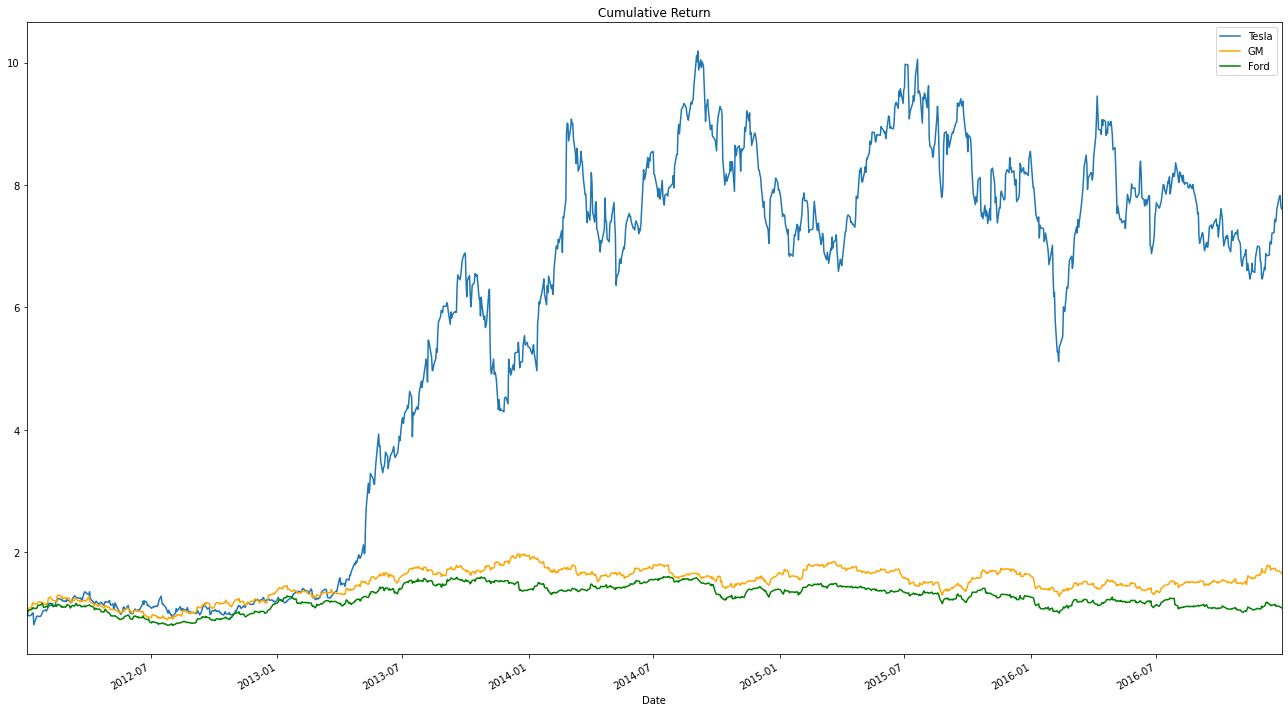

In [321]:


fig,ax =plt.subplots(figsize=(18,10))

# formater les axes pour afficher sous formats année, mois

locator = mdates.AutoDateLocator(maxticks=9)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlim([gm.index[0], gm.index[gm.index.__len__()-1]])
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
tesla_stock['cumulative daily return'].plot(x=tesla_stock.index)
gm_stock['cumulative daily return'].plot(x=gm_stock.index, color='orange')
ford_stock['cumulative daily return'].plot(x=ford_stock.index, color='g')
plt.legend(['Tesla', 'GM', 'Ford'])
plt.title('Cumulative Return')

plt.show()

# Bon travail!

Voilà pour l'analyse de base,  l'apprentissage des outils du métier d'analyse financière :-)

In [322]:
# Merci ! 